# Proposal

## Title: 

### Introduction

Data science and STEM careers are growing in popularity as more businesses leverage technological advances to solve challenges and streamline operations. Among them, students who are waiting for employment or employees who want to change careers are very curious about what can be the mean factors that impact the tracjectory of salaries and bonuses among the top 5 companies counts from our data. The purpose of the experiment was to determine which combination of three predictors out of four predictors "years at work," "gender," "base salary," and "bonus" most accurately predicted a person's career in STEM and data science In order to provide application suggestions for job seekers with different work experience and salary expectations. This is to suggest that the job seekers can be more insightful and intentional with their development and career path. The dataset we will be working with is the "Data Science and STEM Salary" dataset from Kaggle, which contains information on numerous job titles and other criteria, and has 62,000 salary records from the leading organizations for this project. 

### Preliminary exploratory data analysis

First step of the preliminary exploratory data analysis is to clean and wrangle the data into tidy format. Therefore, before we start to write code for the process, we are going to load the library required for the data analysis.

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

The data we are going to use for this project is about **Data Science and STEM Salaries** taken from **Kaggle**, with the link https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries
- Firstly, we download the data 'Levels_Fyi_Salary_Data.csv' from the link above. We can see the columns available for wrangling, the detail and brief explanation for each columns. These explanation will be important for dropping trivial columns for our analysis later on.
- Next, we upload our data to the Jupyter Notebook in the 'data' folder.
- After that, we opened the 'Levels_Fyi_Salary_Data.csv' to check that the data inside is in a comma-separated file format, with no header or additional information that might hinder the reading process.
- Finally, we read the data using 'read_csv' and assign it to a variable named salary_data, as follows.

In [2]:
salary_data <- read_csv("data/Levels_Fyi_Salary_Data.csv")
salary_data

Rows: 62642 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): timestamp, company, level, title, location, tag, gender, otherdeta...
dbl (19): totalyearlycompensation, yearsofexperience, yearsatcompany, basesa...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,⋯,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NA,107000,⋯,0,0,0,0,0,0,0,0,NA,NA
6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NA,0,⋯,0,0,0,0,0,0,0,0,NA,NA
6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NA,155000,⋯,0,0,0,0,0,0,0,0,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14,12,Full Stack,157000,⋯,0,0,0,0,0,0,0,0,NA,NA
9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8,4,iOS,194688,⋯,0,0,0,0,0,0,0,0,NA,NA
1/29/2019 5:12:59,apple,ict3,Software Engineer,200000,"Sunnyvale, CA",0,0,ML / AI,155000,⋯,0,0,0,0,0,0,0,0,NA,NA


Now, we look at the data, and we immediately notice that it is not yet in tidy format.  
Here are several things we need to sort it out: first, we count the number of data entries of all companies, so as to get the top five companies with the most data by function group_by(), summarize() and head().They are Amazon, Microsoft, Google, Facebook and Apple. Then we select all the required columns, and filter out the top five companies we will analyze, and remove the rows containing NA and base salary not greater than 0, and sort them in descending order of the number of company data rows.  
Second, we need to convert the gender column as a character into a numeric type, so we use 1 and 2 as the numerical pronouns for male and female to the data. And change the salary to count in thousand.

In [3]:
top_5_company_count <- salary_data |> group_by(company) |> summarize(count=n()) |> arrange(desc(count)) |> head(5)
top_5_company_count

company,count
<chr>,<int>
Amazon,8126
Microsoft,5216
Google,4330
Facebook,2990
Apple,2028


In [4]:
tidy_data <- salary_data |>
select(company, yearsofexperience, basesalary, bonus, gender) |>
filter(company == "Amazon" |company == "Microsoft"|company == "Google"|company == "Facebook"|company == "Apple") |>
filter(!is.na(gender)) |>
filter(gender == "Male" | gender == "Female") |>
filter(basesalary > 0) |>
group_by(company) |> 
mutate(data_count=n()) |> 
arrange(desc(data_count)) 
tidy_data$gender[tidy_data$gender == "Male"] <- "1"
tidy_data$gender[tidy_data$gender == "Female"] <- "2"
tidy_data$gender <- as.numeric(tidy_data$gender) 
tidy_data

company,yearsofexperience,basesalary,bonus,gender,data_count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Amazon,12,142000,0,1,5323
Amazon,5,134000,0,2,5323
Amazon,12,156000,61000,1,5323
⋮,⋮,⋮,⋮,⋮,⋮
Apple,0,120000,20000,2,1344
Apple,10,146000,20000,1,1344
Apple,2,135000,30000,1,1344


Thirdly, the obtained tidy_data is divided into training data and testing data 75% to 25%, respectively for training and testing the variable we will predict: company.  

In [5]:
data_split <- initial_split(tidy_data, prop = 0.75, strata = company)  
data_train <- training(data_split)   
data_test <- testing(data_split)
data_train
data_test

company,yearsofexperience,basesalary,bonus,gender,data_count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Amazon,5,134000,0e+00,2,5323
Amazon,37,160000,2e+05,1,5323
Amazon,8,155000,0e+00,1,5323
⋮,⋮,⋮,⋮,⋮,⋮
Apple,20,220000,25000,1,1344
Apple,4,140000,0,1,1344
Apple,10,146000,20000,1,1344


company,yearsofexperience,basesalary,bonus,gender,data_count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Amazon,12,142000,0,1,5323
Amazon,12,156000,61000,1,5323
Amazon,3,145000,60000,1,5323
⋮,⋮,⋮,⋮,⋮,⋮
Apple,35,212000,30000,1,1344
Apple,5,155000,30000,1,1344
Apple,2,135000,30000,1,1344


After getting the training data, we counted the average basic salary and average benefits of each company, and sorted them in descending order. As for gender, we firstly analyzed the gender distribution of each company using a histogram, and then choose to use visualization to represent the changing trend of basic salary and bonus of employees of different genders when their work experience changes.

In [6]:
mean_table1 <- aggregate(data_train$basesalary, by = list(type = data_train$company),mean)
names(mean_table1) <- c("company","mean_basesalary")
arrange(mean_table1,desc(mean_basesalary))

company,mean_basesalary
<chr>,<dbl>
Facebook,174193.5
Apple,163090.0
Google,154360.6
Microsoft,139512.2
Amazon,134035.6


In [7]:
mean_table2 <- aggregate(data_train$bonus, by = list(type = data_train$company),mean)
names(mean_table2) <- c("company","mean_bonus")
arrange(mean_table2,desc(mean_bonus))

company,mean_bonus
<chr>,<dbl>
Google,31884.25
Facebook,31336.60
Microsoft,25963.57
Apple,23030.26
Amazon,18499.20


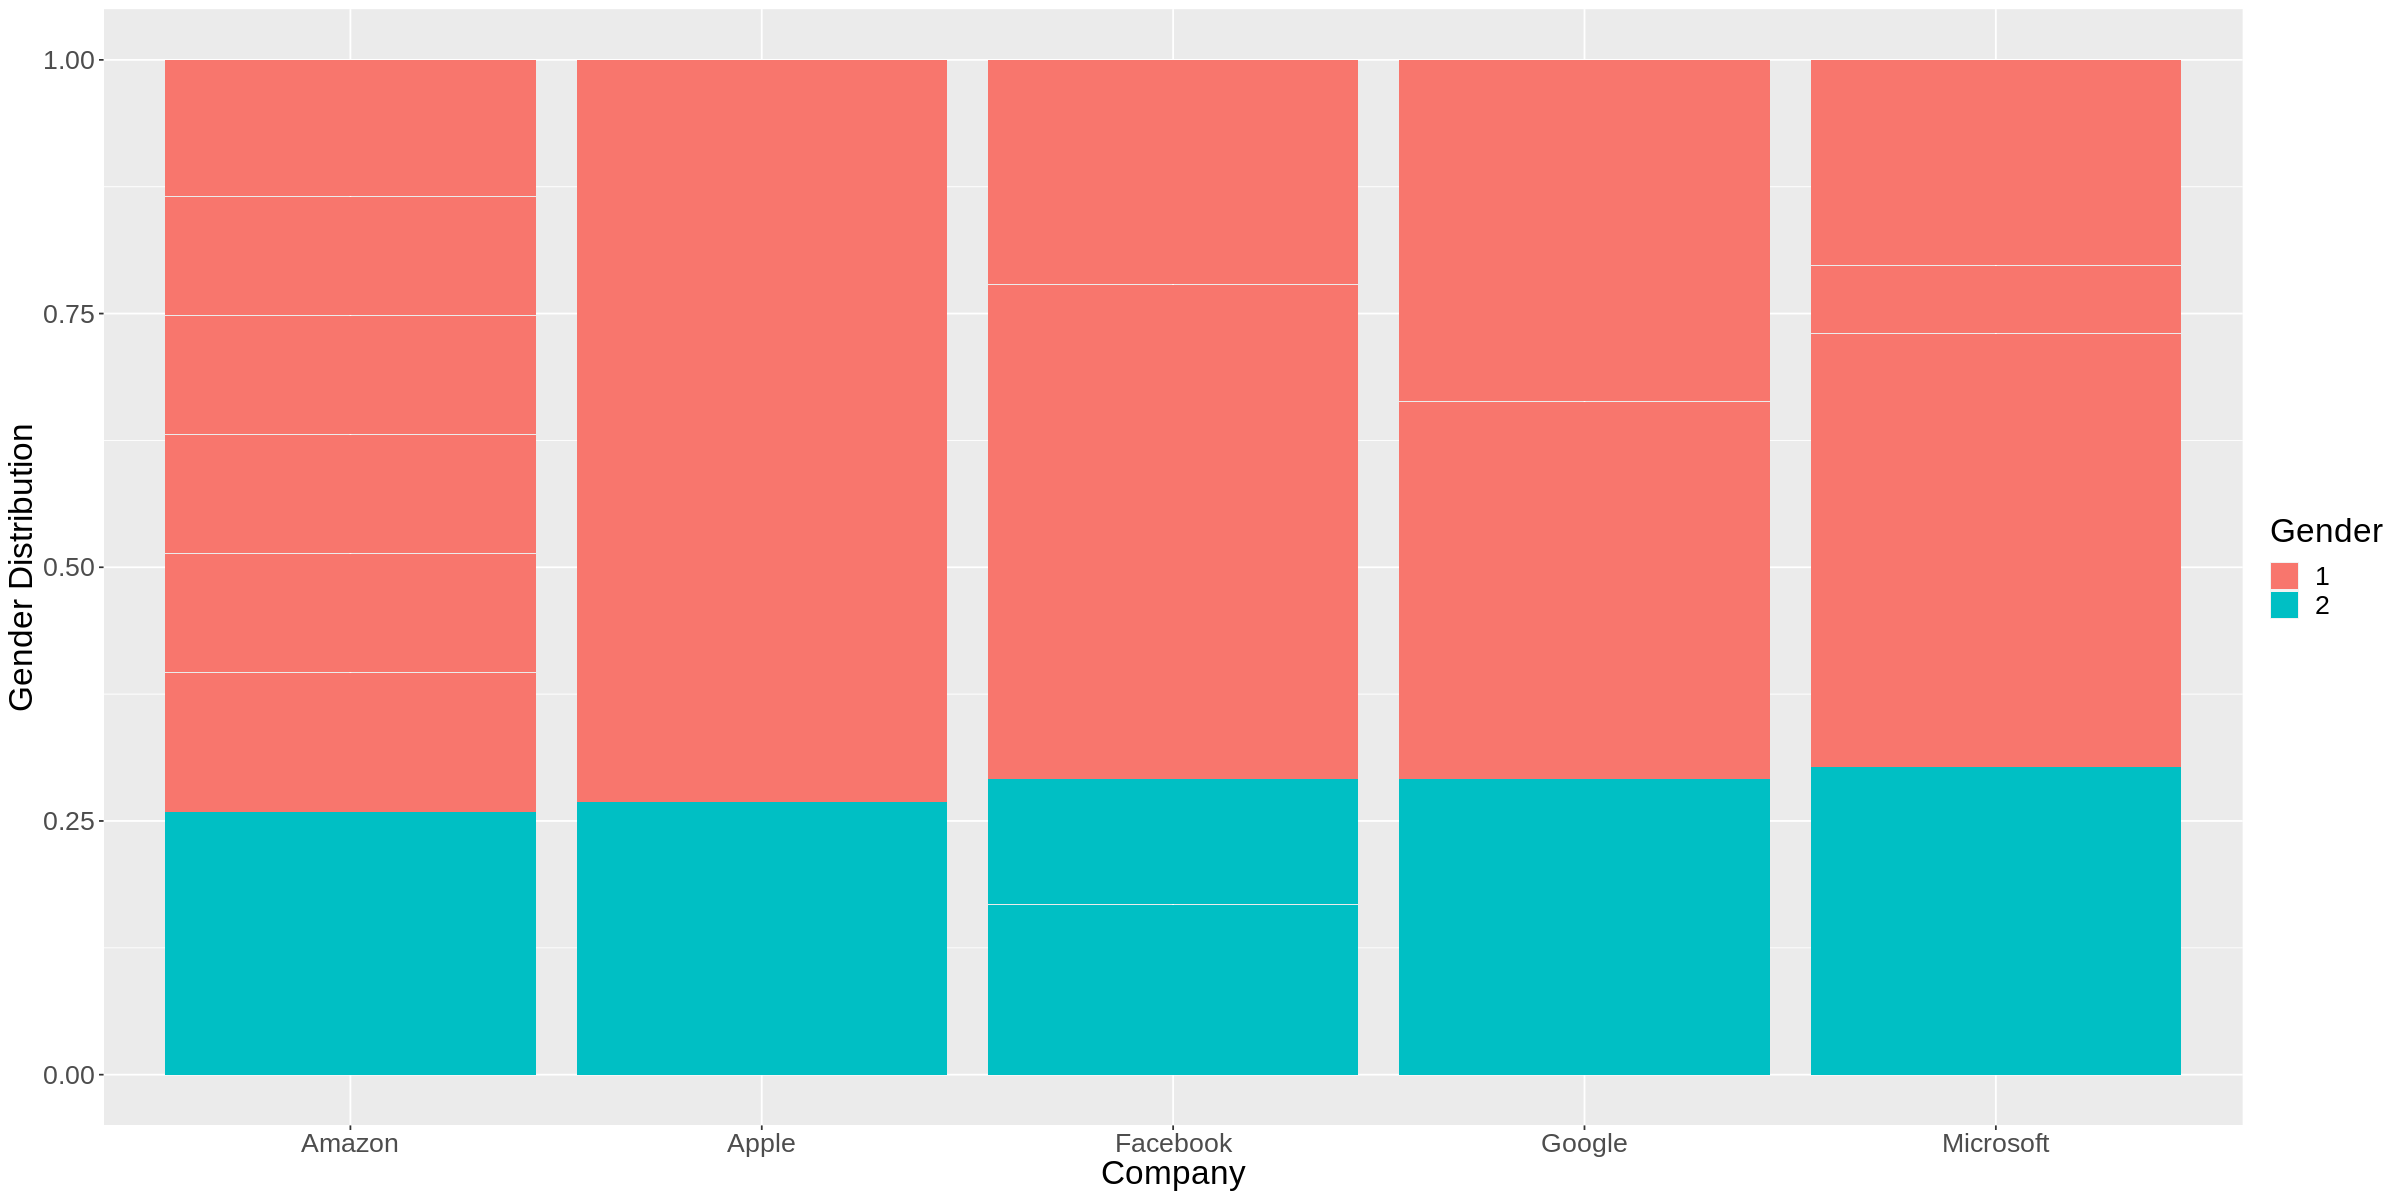

In [11]:
options(repr.plot.width = 20, repr.plot.height = 10)
gender_distribution <- 
    ggplot(data_train, aes(x = company, y = gender, fill = as.factor(gender))) + 
        geom_bar(stat = "identity", position = "fill") + 
        xlab("Company") +
        ylab("Gender Distribution") +
        labs(fill = "Gender") +
        theme(text = element_text(size=20))
gender_distribution

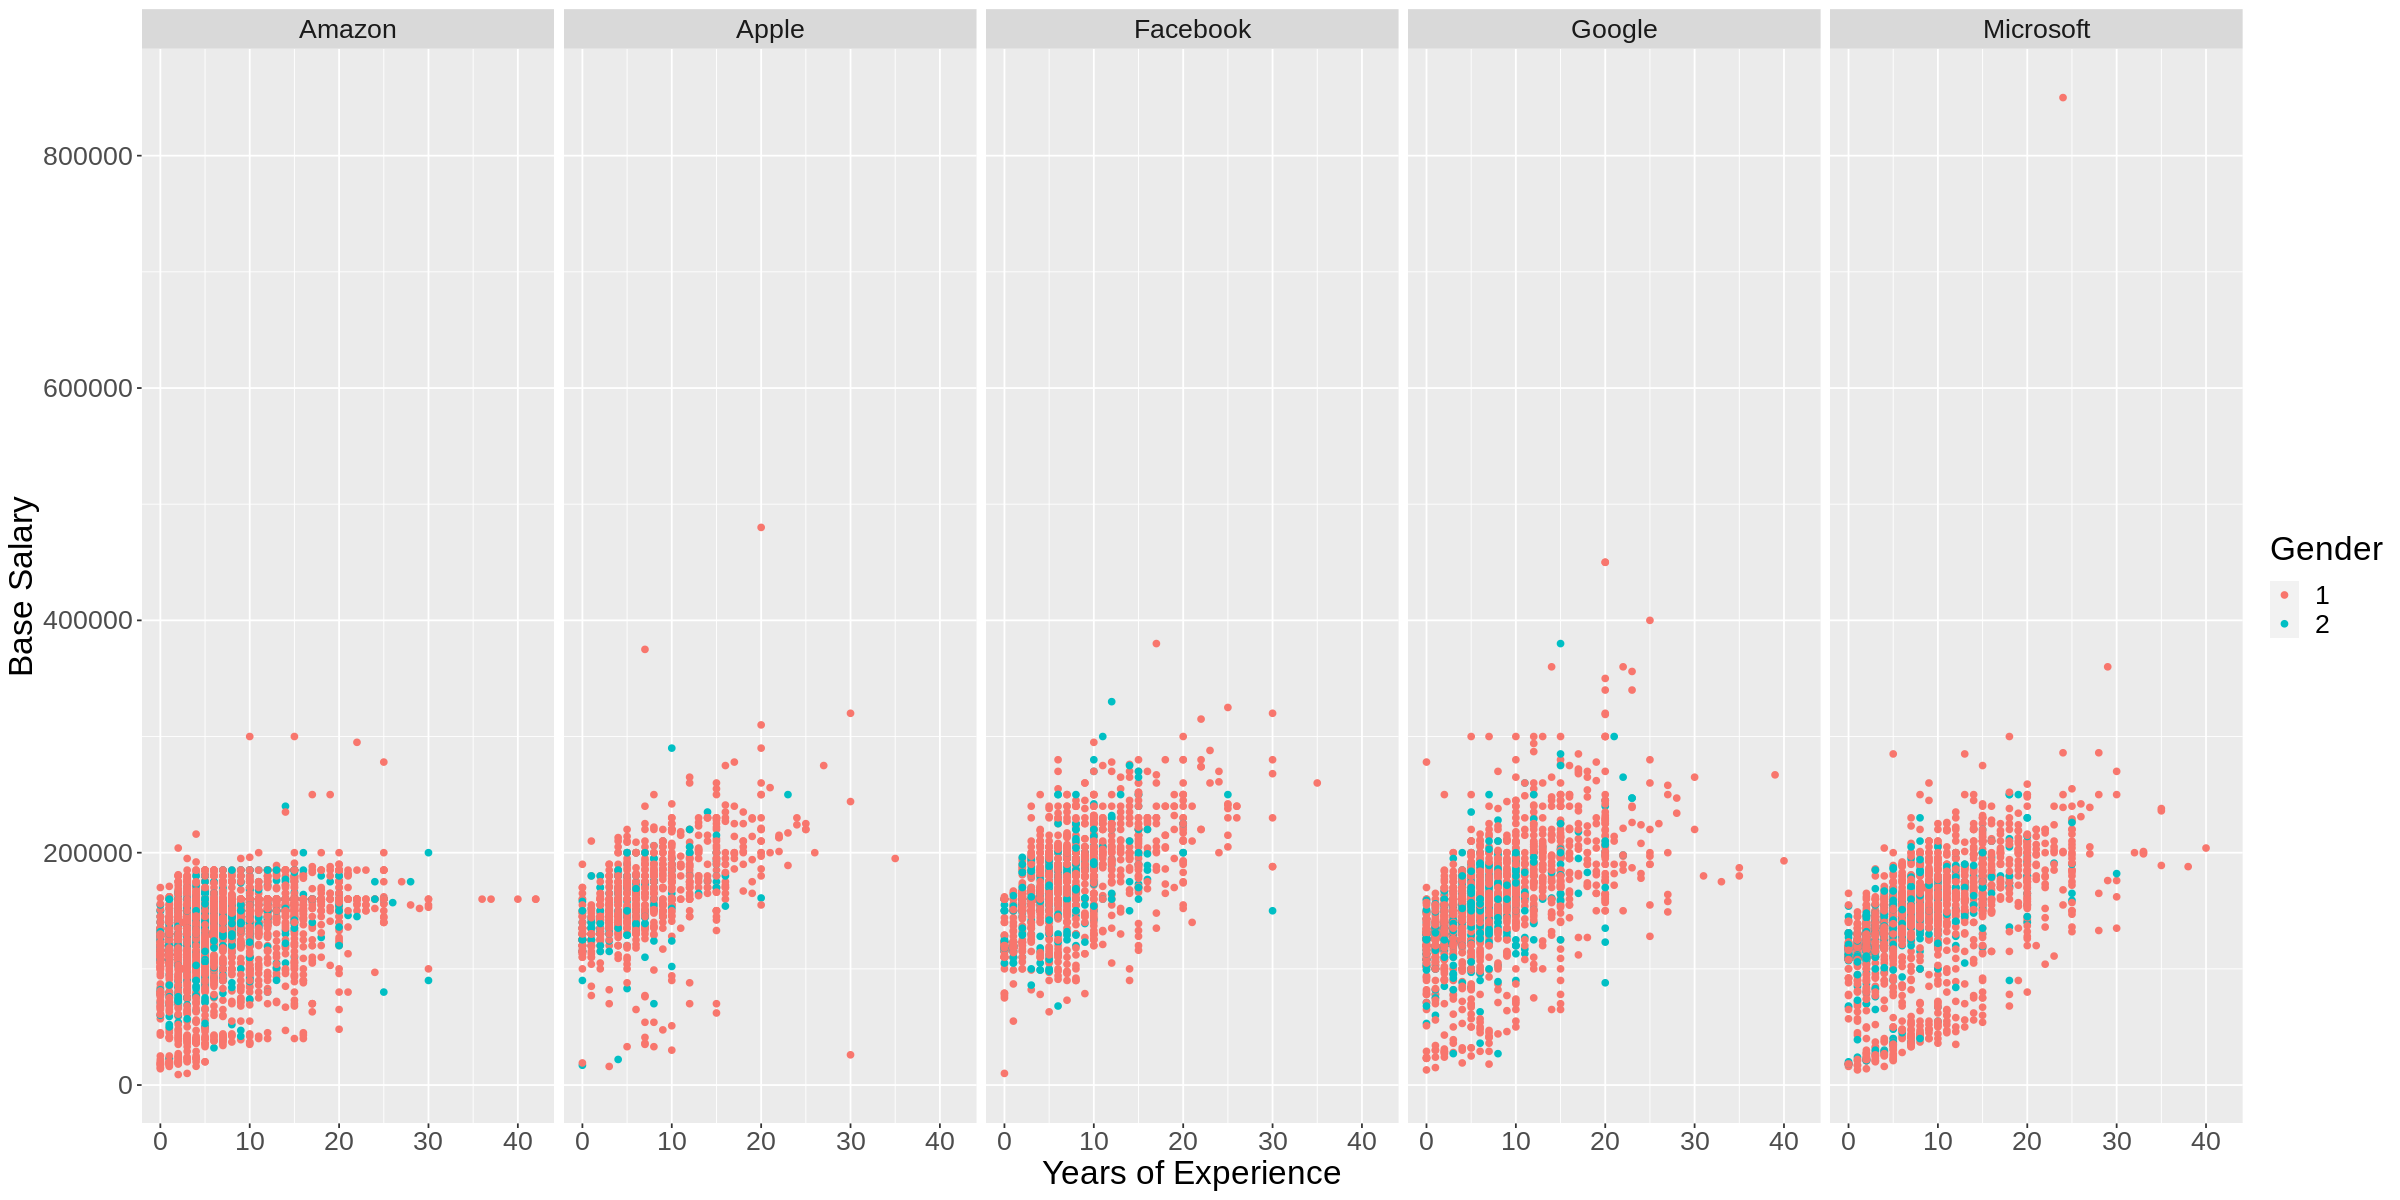

In [15]:
options(repr.plot.width = 20, repr.plot.height = 10)
options(scipen = 10)
salary_gender <- data_train |>
    ggplot(aes(x = yearsofexperience, y = basesalary)) + 
        geom_point(aes(colour = as_factor(gender))) +
        labs(x = "Years of Experience", y = "Base Salary", colour = "Gender") + 
        facet_grid(cols = vars(company))+
        theme(text = element_text(size=20))
salary_gender

In addition, in the above chart, we found that while the ratio of female to male in the five companies increased, the basic salary also had the same trend. We doubt whether this means that the gender ratio is related to the basic salary.

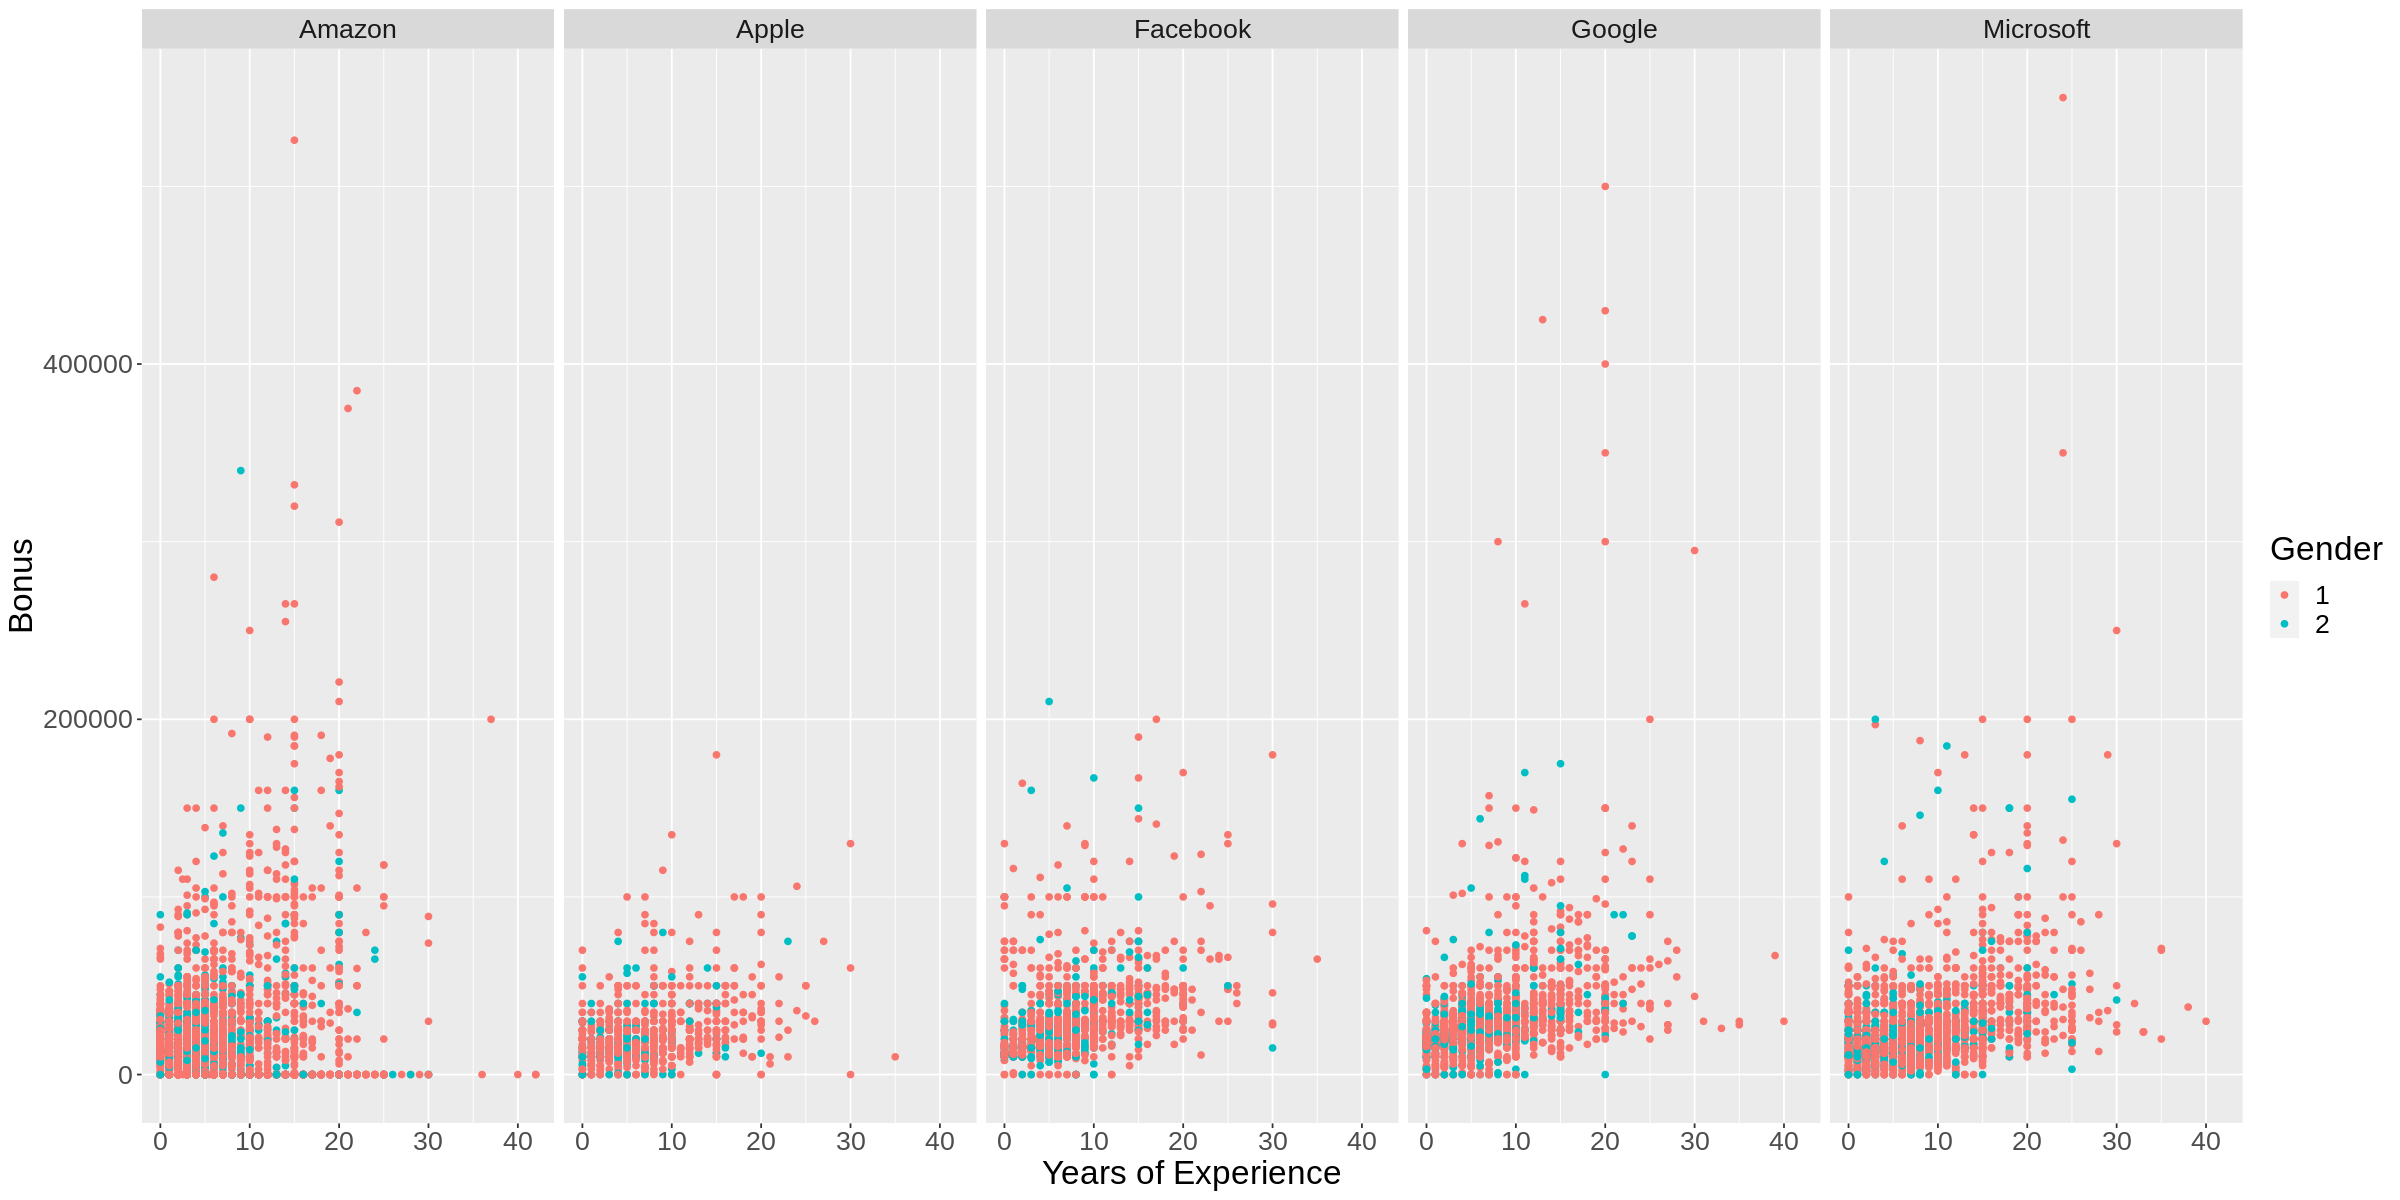

In [10]:
options(repr.plot.width = 20, repr.plot.height = 10)
options(scipen = 10)
bonus_gender <- data_train |>
    ggplot(aes(x = yearsofexperience, y = bonus)) + 
        geom_point(aes(colour = as_factor(gender))) +
        labs(x = "Years of Experience", y = "Bonus", colour = "Gender") + 
        facet_grid(cols = vars(company))+
        theme(text = element_text(size=20))
bonus_gender

### Method

Work experience, gender, base salary, and bonus are the quantitative variables that we will use to predict the categorical variable company. At the end of the second part we have split the data into training and testing sets. The training set is used to create recipes and fit models, while the test set is used to predict outcomes and determine accuracy and workflow analysis. Then we will make various combinations of the four predictors as a combination of three or two predictors to predict the company name, so a total of 4 or 6 predictions are required. We will visualize the prediction results and accuracy vs k for each predictor combination to better compare prediction performance and accuracy.



### Expected outcomes and significance
- What do you expect to find?
In this project, we expect to find the most relevant predictors that can affect the company you join. This can vary based on years of experience, gender, and expected salary.
- What impact could such findings have?
The impact is impactful to the job market and the trajectory of the career path for the people who are currently searching for jobs and people who are interested in learning more about their career development. Those perdictors can be something to consider, when they are researching for opportunities. 
- What future questions could this lead to?
As our dataset is not fully complete - some variables have high percentage of N/A, it will be helpful to refresh the survey in the near future to get more information. This can provide us with a clear understanding and stengthen the correlation of the variables. 